<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/PromptsTop2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 2.7 MB/s eta 0:00:00


In [7]:
from datasets import load_dataset

# Load the dataset
prompts = load_dataset("DIBT/10k_prompts_ranked")
# To get all prompts from the 'train' subset of the dataset without selecting a subset
all_prompts = dataset['train']['prompt']


# Shuffle the dataset and select the first 1000 entries from the first column
# random_prompts = dataset['train'].shuffle(seed=42).select(range(1000))['prompt']




In [3]:
!pip install top2vec -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 47.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.6 MB/s eta 0:00:00


In [10]:
from top2vec import Top2Vec

# Assuming 'documents' is a list of text documents you wish to model
model = Top2Vec(all_prompts, embedding_model='doc2vec', speed='fast-learn')


# Now you can use the model to find topics, get topic sizes, etc.
topics = model.get_topics()


2024-03-20 20:59:49,127 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-03-20 20:59:54,900 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-20 21:01:39,080 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-20 21:02:22,174 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-20 21:02:22,660 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [19]:
model.get_num_topics()

2

In [11]:
topics_words, word_scores, topic_nums = model.get_topics()


In [14]:
topic_nums

array([0, 1])

In [15]:
topics_words

array([['meow', 'provide', 'mph', 'and', 'about', 'how', 'but',
        'additionally', 'well', 'them', 'natvs', 'they', 'such',
        'please', 'virtualenvs', 'caches', 'would', 'pypoetry', 'uint',
        'incorporate', 'impact', 'implications', 'way', 'to', 'or',
        'abhishekpillai', 'use', 'of', 'who', 'what', 'be', 'also',
        'explore', 'me', 'the', 'like', 'people', 'consider',
        'strategies', 'think', 'just', 'some', 'potential', 'personal',
        'for', 'develop', 'incorporating', 'comprehensive', 'do',
        'their'],
       ['symbols', 'verbal', 'mathematical', 'descriptions', 'equations',
        'meow', 'incorporate', 'provide', 'incorporating',
        'additionally', 'latex', 'techniques', 'use', 'only', 'utilize',
        'concepts', 'ethical', 'luck', 'visually', 'such', 'solve',
        'concise', 'explain', 'strategies', 'elaborate', 'consider',
        'remember', 'calculate', 'cultural', 'please', 'algorithms',
        'unique', 'demonstrate', 

In [16]:
# Assuming 'model' is your trained Top2Vec model and 'keywords' is a list of keywords.
keywords = ["python"]
documents, document_score, document_ids = model.search_documents_by_keywords(keywords=keywords, num_docs=10)

# This will return the top 10 most similar documents to the provided keywords,
# their similarity scores, and their IDs within the model.


In [17]:
# Print the results
for i in range(len(documents)):
    print(f"Document ID: {document_ids[i]}")
    print(f"Similarity Score: {document_score[i]}")
    print(f"Document Content: {documents[i][:20]}...")  # Print the first 200 characters to get an idea of the document content
    print("---")

Document ID: 5659
Similarity Score: 0.643694281578064
Document Content: I'm trying to use VS...
---
Document ID: 5181
Similarity Score: 0.6431697607040405
Document Content: Write a program in P...
---
Document ID: 2484
Similarity Score: 0.6375595927238464
Document Content: there is one 1.py fi...
---
Document ID: 1675
Similarity Score: 0.6322206258773804
Document Content: ImportError: cannot ...
---
Document ID: 1497
Similarity Score: 0.625790536403656
Document Content: :
You are given a co...
---
Document ID: 10166
Similarity Score: 0.6254812479019165
Document Content: You are tasked with ...
---
Document ID: 2958
Similarity Score: 0.6156641840934753
Document Content: What is this doing?
...
---
Document ID: 10191
Similarity Score: 0.6110947728157043
Document Content: Write a python scrip...
---
Document ID: 4506
Similarity Score: 0.6110662817955017
Document Content: You are given a code...
---
Document ID: 3616
Similarity Score: 0.6064033508300781
Document Content: You are given a co

In [18]:
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(document_embeddings)

# Plot the UMAP embeddings, colored by topic
plt.figure(figsize=(12, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=document_topics, alpha=0.5, cmap='viridis')
plt.title('UMAP projection of Document Embeddings', fontsize=18)
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.colorbar(label='Topic')
plt.show()

NameError: name 'umap' is not defined

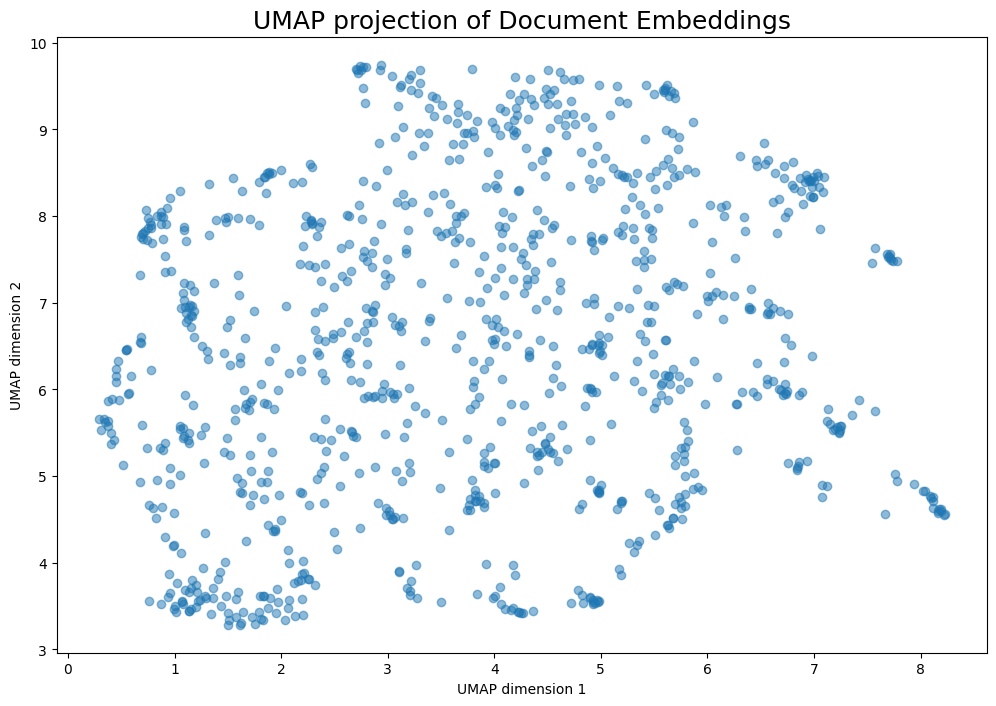

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap  # UMAP for dimensionality reduction

# Assuming 'model' is your trained Top2Vec model

# Retrieve document embeddings from the Top2Vec model
document_embeddings = model.document_vectors

# Reduce the dimensionality of embeddings to 2D for visualization
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(document_embeddings)

# Plot the UMAP embeddings
plt.figure(figsize=(12, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], alpha=0.5)
plt.title('UMAP projection of Document Embeddings', fontsize=18)
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.show()


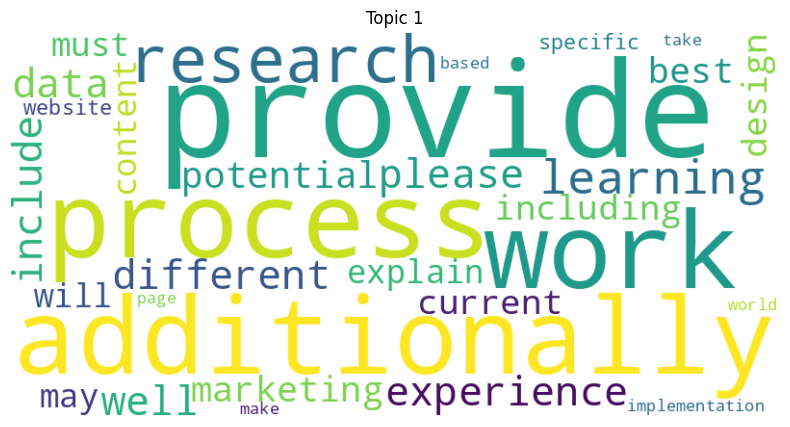

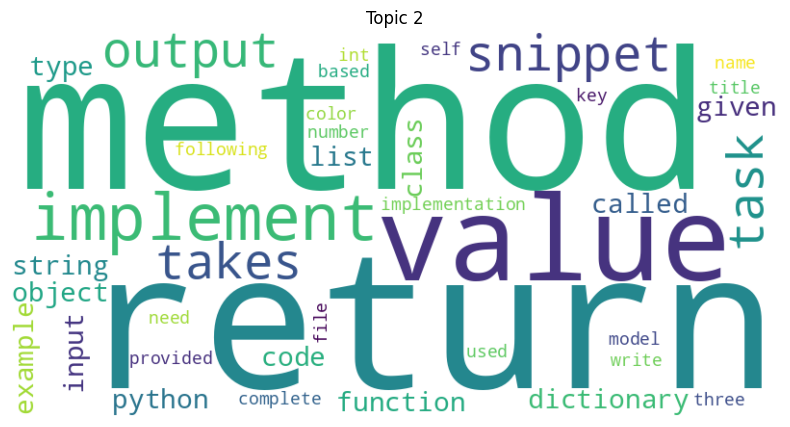

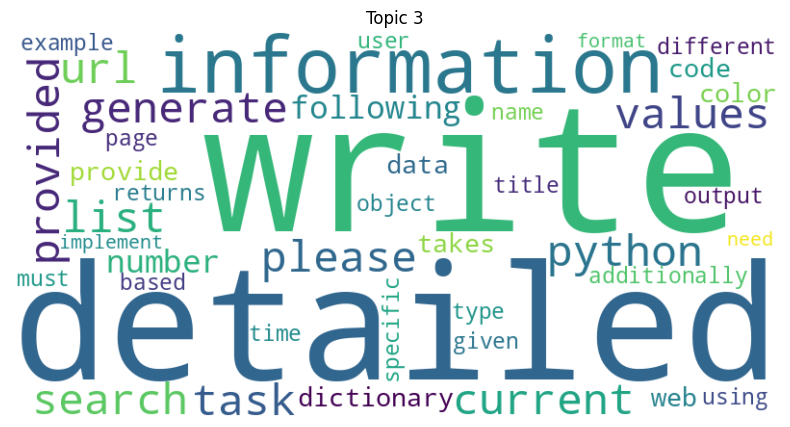

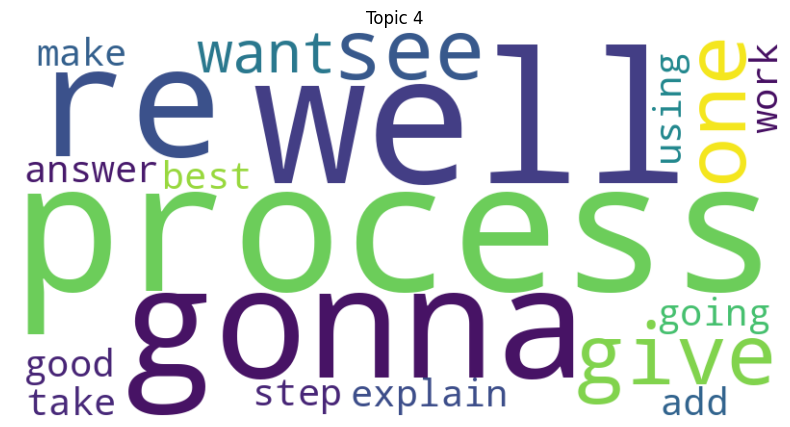

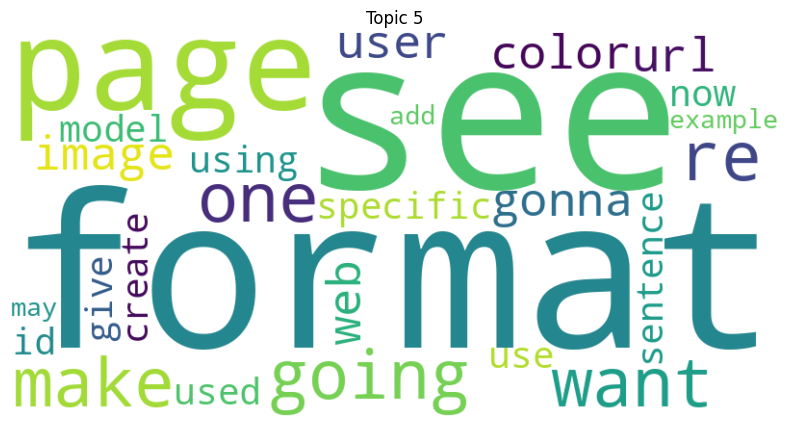

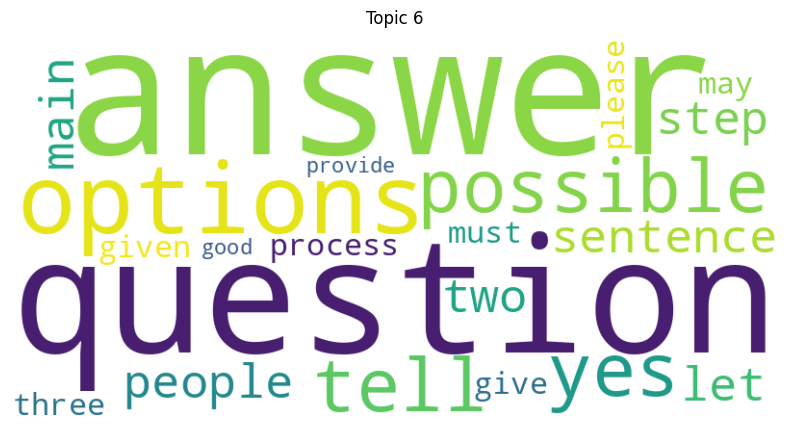

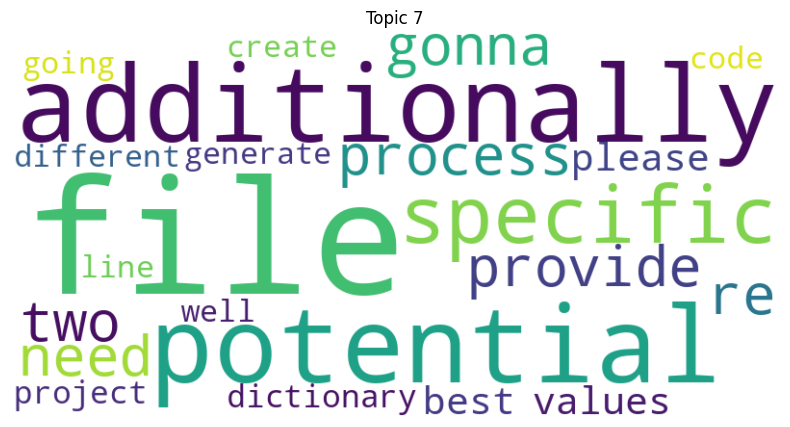

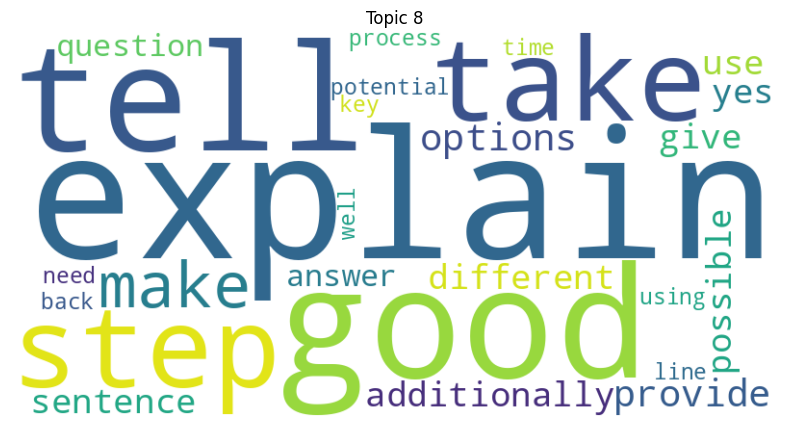

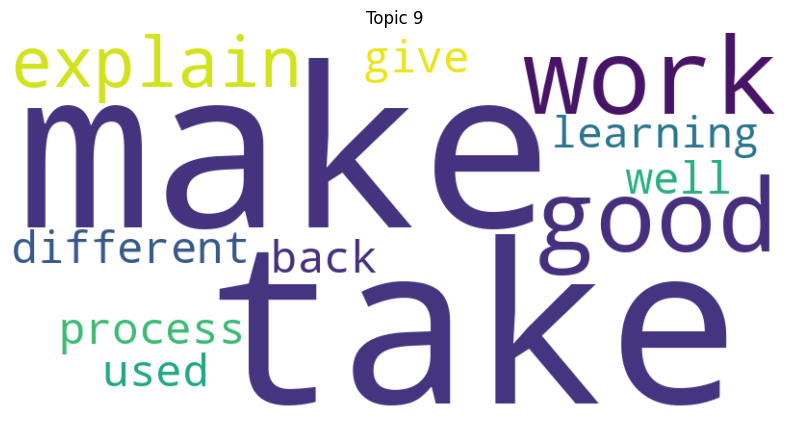

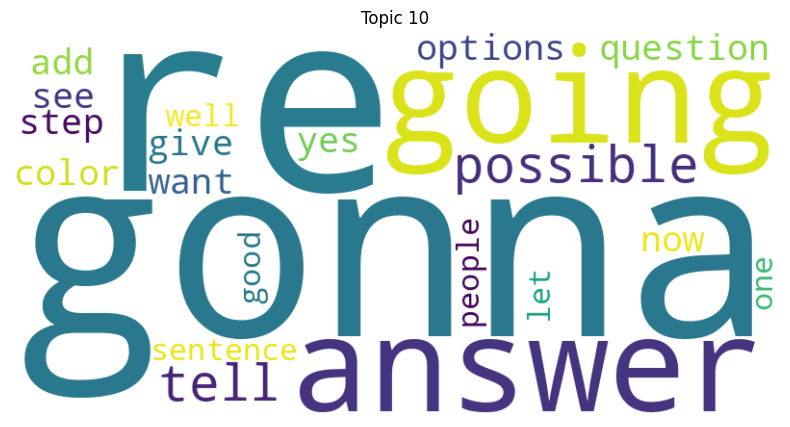

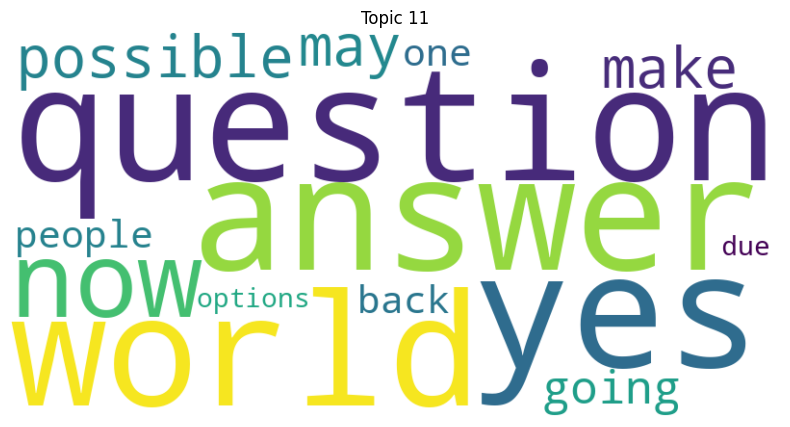

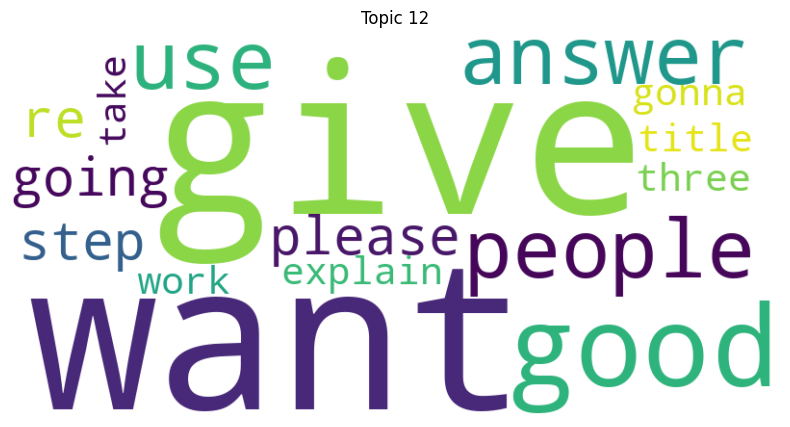

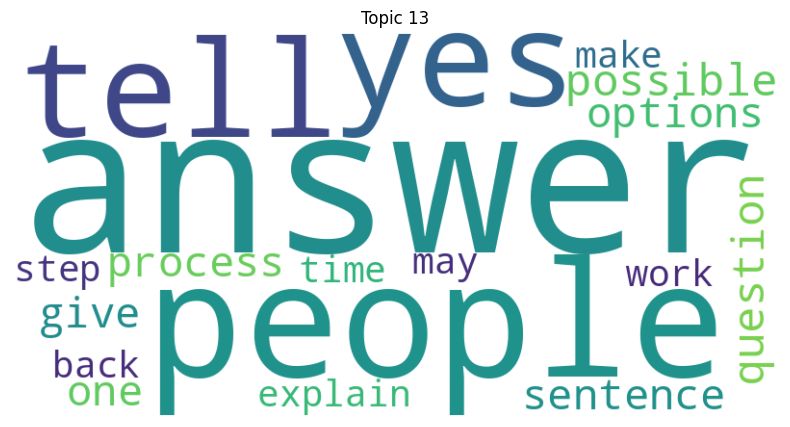

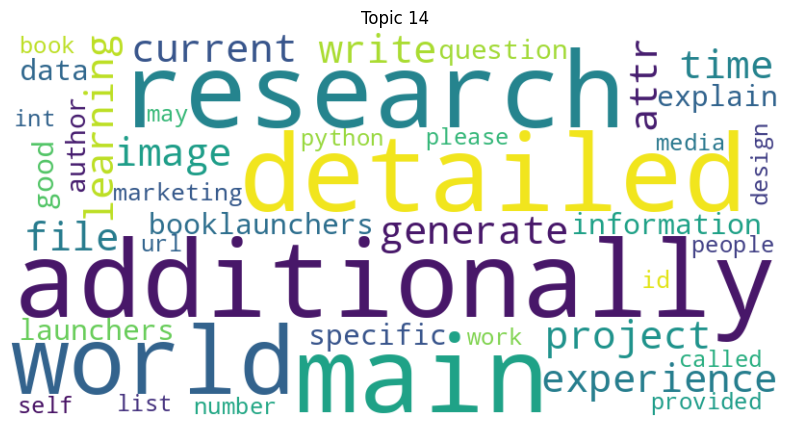

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already retrieved topics_words from your model
# And there are only two topics

for i in range(len(topic_nums)):  # Loop through the two topics
    # Generate a single string with all words for the topic
    topic_words_combined = ' '.join(topics_words[i])

    # Generate the word cloud for this topic
    wordcloud = WordCloud(width=800, height=400,  # You can adjust the size to your liking
                          background_color='white',
                          min_font_size=10).generate(topic_words_combined)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))  # Adjust figsize to your liking
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f'Topic {i+1}')
    plt.show()  # Show the current figure before moving on to the next
